In [22]:
import sys, os
# os.environ["THEANO_FLAGS"] = "device=cuda"  # use gpu
sys.path.append("../../../")
import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import topology_numpy as tpn
import warnings
warnings.filterwarnings("ignore")
import logging
from importlib import reload
from copy import copy

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


Active grids: ['regular']
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2
Compilation Done!


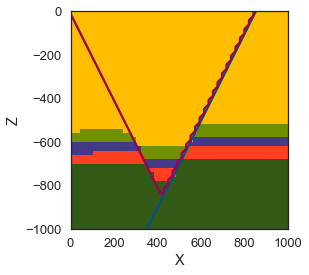

In [4]:
geo_model = gp.load_model(
    'Tutorial_ch1-9b_Fault_relations', 
    path= '../../data/gempy_models', 
    recompile=True
)
gp.compute_model(geo_model)
gp.plot.plot_section(geo_model, show_data=True)

In [5]:
res = geo_model.grid.regular_grid.resolution
lb = np.round(geo_model.solutions.block_matrix[-1, 0, :]).astype(int)
fb = np.round(geo_model.solutions.block_matrix[:-1, 0, :]).astype(int)

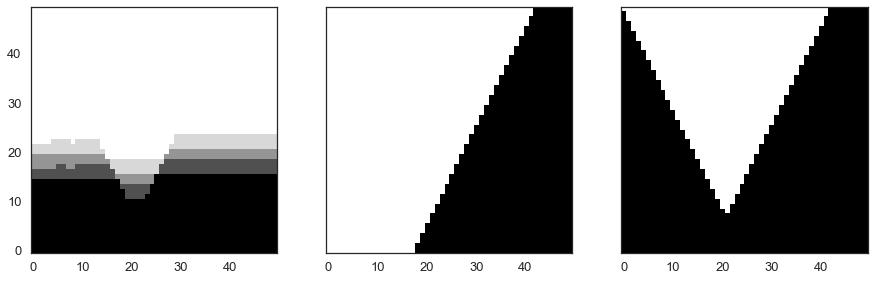

In [6]:
fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(15,8))

for ax, block in zip(axs, (lb, *fb)):
    ax.imshow(block.reshape(*res)[:, 24, :].T, origin="lower")

In [7]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
7,fault2,fault_series2,1,False,#015482,1
5,fault1,fault_series1,1,False,#9f0052,2
6,rock4,series1,1,False,#ffbe00,3
0,rock3,series1,2,False,#728f02,4
3,rock2,series1,3,False,#443988,5
1,rock1,series1,4,False,#ff3f20,6
4,basement,basement_series,1,True,#325916,7


In [8]:
geo_model.faults

,isFault,isFinite
fault_series2,True,False
fault_series1,True,False
series1,False,False
basement_series,False,False


In [15]:
logging.basicConfig(level=logging.DEBUG, format='%(message)s')

In [80]:
reload(tpn)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [122]:
fb

array([[1, 1, 1, ..., 2, 2, 2],
       [3, 3, 3, ..., 3, 3, 3]])

In [128]:
from logging import debug

In [250]:
def get_labels(lb, fb):
    # faults
    fb -= 1
    fb += np.arange(n_faults)[None, :].T
    
    debug(f"fb shp: {fb.shape}; fb unique: {np.unique(fb)}")
    for i, block in enumerate(fb):
        debug(f"fb {i}: {np.unique(block)}")
    
    # lithologies
    debug(f"lb shp: {lb.shape}; lb unique: {np.unique(lb)}")
    lb = lb - lb.min() + n_faults + 2
    debug(f"lb shift unique: {np.unique(lb)}")
    
    labels = 2**np.concatenate((lb[None, :], fb), axis=0)
    debug(f"labels shp: {labels.shape}")
    debug(f"\nunique labels:")
    for label in np.unique(labels):
        debug(np.binary_repr(label).zfill(9) + " <-> " + str(label))
    
    labels = labels.sum(axis=0)
    debug(f"\nsummed labels:\nsum unique: {np.unique(labels)}")
    for label in np.unique(labels):
        debug(np.binary_repr(label).zfill(9) + " <-> " + str(label))
    return labels

In [251]:
lb, fb = tpn.lithblock_to_lb_fb(geo_model)
label(lb, fb)

fb shp: (2, 125000); fb unique: [0 1 2 3]
fb 0: [0 1]
fb 1: [2 3]
lb shp: (125000,); lb unique: [3 4 5 6 7]
lb shift unique: [4 5 6 7 8]
labels shp: (3, 125000)

unique labels:
000000001 <-> 1
000000010 <-> 2
000000100 <-> 4
000001000 <-> 8
000010000 <-> 16
000100000 <-> 32
001000000 <-> 64
010000000 <-> 128
100000000 <-> 256

summed labels:
sum unique: [ 21  25  26  37  41  42  69  73  74 133 137 138 261 265 266]
000010101 <-> 21
000011001 <-> 25
000011010 <-> 26
000100101 <-> 37
000101001 <-> 41
000101010 <-> 42
001000101 <-> 69
001001001 <-> 73
001001010 <-> 74
010000101 <-> 133
010001001 <-> 137
010001010 <-> 138
100000101 <-> 261
100001001 <-> 265
100001010 <-> 266


array([265, 265, 265, ...,  26,  26,  26], dtype=int32)

fb shp: (2, 125000); fb unique: [0 1 2 3]
fb 0: [0 1]
fb 1: [2 3]
lb shp: (125000,); lb unique: [3 4 5 6 7]
lb shift unique: [4 5 6 7 8]
labels shp: (3, 125000)

unique labels:
000000001 <-> 1
000000010 <-> 2
000000100 <-> 4
000001000 <-> 8
000010000 <-> 16
000100000 <-> 32
001000000 <-> 64
010000000 <-> 128
100000000 <-> 256

summed labels:
sum unique: [ 21  25  26  37  41  42  69  73  74 133 137 138 261 265 266]
000010101 <-> 21
000011001 <-> 25
000011010 <-> 26
000100101 <-> 37
000101001 <-> 41
000101010 <-> 42
001000101 <-> 69
001001001 <-> 73
001001010 <-> 74
010000101 <-> 133
010001001 <-> 137
010001010 <-> 138
100000101 <-> 261
100001001 <-> 265
100001010 <-> 266
sum_x shp: (49, 50, 50)
sum_y shp: (50, 49, 50)
sum_z shp: (50, 50, 49)
slx slice(0, -1, None); sly slice(0, -1, None); slz slice(0, -1, None)
(3, 49, 49, 49)


Uniquely labeled all geobodies: True


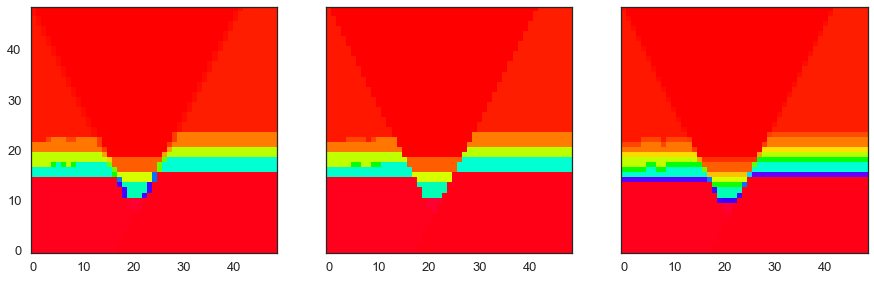

In [395]:
# labels, olabels = tpn.get_labels_block(geo_model)
lb, fb = tpn.lithblock_to_lb_fb(geo_model)
labels = get_labels(lb, fb).reshape(50, 50, 50)
ulabels = np.unique(labels)
print("Uniquely labeled all geobodies:", len(np.unique(labels)) == 15)
shift_blocks = tpn.get_topo_block(labels, n_shift=1)

fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(15,8))

for ax, img in zip(axs, shift_blocks):
    ax.imshow(img[:, 24, :].T, origin="lower", cmap="hsv")

How to now combine the 3 shift arrays?

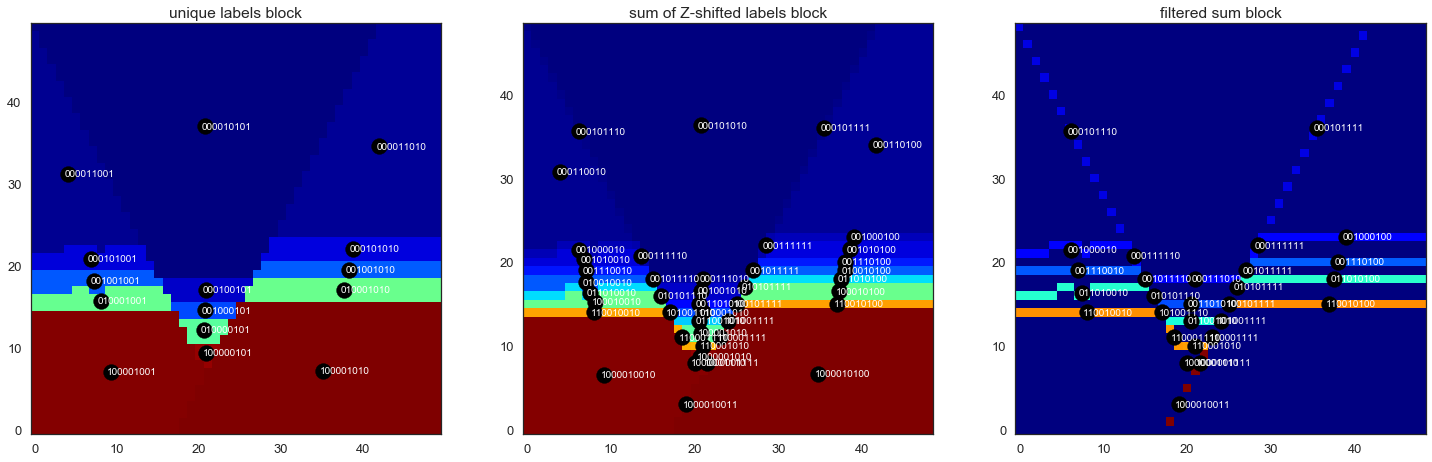

In [367]:
logger.setLevel(logging.CRITICAL)

topo_block = copy(shift_blocks[-1])
topo_block_filtered = copy(shift_blocks[-1])
topo_block_filtered[np.isin(topo_block_filtered, 2*np.unique(labels))] = 0

diff_ctrs = tpn.get_centroids(topo_block, np.unique(topo_block))
diff_ctrs_filtered = tpn.get_centroids(topo_block_filtered, np.unique(topo_block_filtered))

fig, axs = plt.subplots(figsize=(25,10), ncols=3)

labels_ctrs = tpn.get_centroids(labels, np.unique(labels))
ax = axs[0]
for k, v in labels_ctrs.items():
    ax.scatter(v[0], v[2], c="k", s=250)
    ax.text(v[0]-0.4, v[2]-0.3, np.binary_repr(k).zfill(9), c="w")
ax.set_title("unique labels block")
ax.imshow(labels[:, 24, :].T, origin="lower", cmap="jet")

ax = axs[1]
for k, v in diff_ctrs.items():
    if k == 0:
        continue
    ax.scatter(v[0], v[2], c="k", s=250)
    ax.text(v[0]-0.4, v[2]-0.3, np.binary_repr(k).zfill(9), c="w")
ax.set_title("sum of Z-shifted labels block")
ax.imshow(topo_block[:, 24, :].T, origin="lower", cmap="jet")

ax = axs[2]
for k, v in diff_ctrs_filtered.items():
    if k == 0:
        continue
    ax.scatter(v[0], v[2], c="k", s=250)
    ax.text(v[0]-0.4, v[2]-0.3, np.binary_repr(k).zfill(9), c="w")
ax.set_title("filtered sum block")
ax.imshow(topo_block_filtered[:, 24, :].T, origin="lower", cmap="jet")

In [368]:
ulabel_LOT = tpn.get_node_label_sum_lot(ulabels)

In [448]:
reload(tpn)

<module 'topology_numpy' from 'C:\\Users\\r02as18\\git\\gempy\\notebooks\\experimental\\topology\\topology_numpy.py'>

In [436]:
logger.setLevel(logging.CRITICAL)

# Speed comparison

In [453]:
%%timeit
lb, fb = tpn.lithblock_to_lb_fb(geo_model)
labels = get_labels(lb, fb).reshape(50, 50, 50)
shift_blocks = tpn.get_topo_block(labels, n_shift=1)
shift_blocks[np.isin(shift_blocks, 2*np.unique(labels))] = 0
edges = tpn.get_edges(topo_block_filtered, labels, 1)
centroids = tpn.get_centroids(labels, ulabels)

49.7 ms ± 282 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [454]:
%%timeit
G, c = tp.compute_topology(geo_model, filter_rogue=True)

371 ms ± 2.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [456]:
371 / 49.7 

7.464788732394366

In [ ]:
logger.setLevel(logging.DEBUG)
centroids = tpn.get_centroids(labels, ulabels)

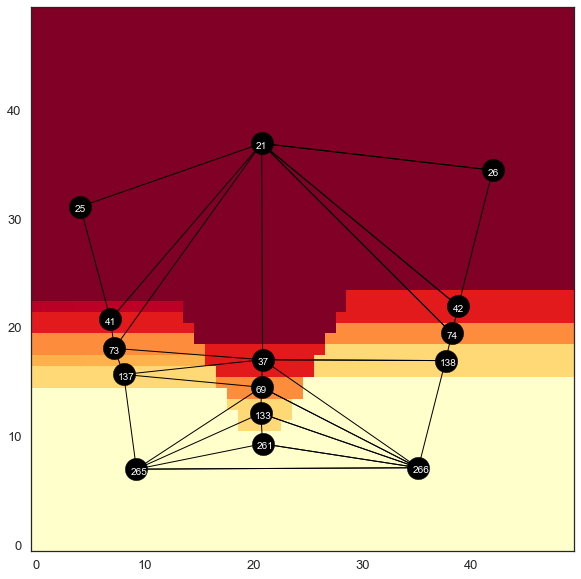

In [433]:
fig = plt.figure(figsize=(10,10))
plt.imshow(geo_model.solutions.block_matrix[-1].reshape(50,50, 50)[:, 24, :].T, origin="lower", cmap="YlOrRd_r")

for edge in edges:
    e1, e2 = edge
    p1 = centroids.get(e1)
    p2 = centroids.get(e2)
    x = (p1[0], p2[0])
    y = (p1[2], p2[2])
    plt.plot(x, y, c="k", linewidth=1)
    
for node in ulabels:
    p = centroids.get(node)
    plt.scatter(p[0], p[2], c="k", s=500)
    plt.text(p[0]-0.5, p[2]-0.5, str(node), c="w")

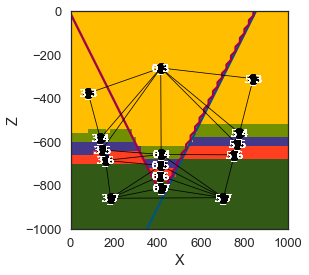

In [291]:
from gempy.assets import topology as tp
G, c = tp.compute_topology(geo_model, filter_rogue=True)
gp.plot.plot_section(geo_model, 24)
gp.plot.plot_topology(geo_model, G, c)